# Performance of LLM Augmented Dataset on RNN

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline

## Download and Prepare Rotten Tomatoes Dataset

In [3]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20% random

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10% and 20% respectively.

In [4]:
# Augment by 5%, 10%, and 20%
augmented_llm_paraphrase_5 = augment_data(original_train_data, 0.05, MODE.LLM_SUMMARIZE)
augmented_llm_summarizer_10 = augment_data(original_train_data,  0.10, MODE.LLM_SUMMARIZE)
augmented_llm_summarizer_20 = augment_data(original_train_data,  0.20, MODE.LLM_SUMMARIZE)
augmented_llm_summarizer_50 = augment_data(original_train_data,  0.50, MODE.LLM_SUMMARIZE)
augmented_llm_summarizer_100 = augment_data(original_train_data,  1.00, MODE.LLM_SUMMARIZE)

# Convert augmented data into Datasets
augmented_llm_paraphrase_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_5],
    "label": [item["label"] for item in augmented_llm_paraphrase_5]
}, features=features)

augmented_llm_paraphrase_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_10],
    "label": [item["label"] for item in augmented_llm_summarizer_10]
}, features=features)

augmented_llm_paraphrase_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_20],
    "label": [item["label"] for item in augmented_llm_summarizer_20]
}, features=features)

augmented_llm_paraphrase_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_50],
    "label": [item["label"] for item in augmented_llm_summarizer_20]
}, features=features)

augmented_llm_paraphrase_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_summarizer_100],
    "label": [item["label"] for item in augmented_llm_summarizer_100]
}, features=features)

# Concatenate original and augmented datasets
augmented_llm_paraphrase_train_data_5 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_5_dataset])
augmented_llm_paraphrase_train_data_10 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_10_dataset])
augmented_llm_paraphrase_train_data_20 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_20_dataset])
augmented_llm_paraphrase_train_data_50 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_50_dataset])
augmented_llm_paraphrase_train_data_100 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_100_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% Summary augmentation: {len(augmented_llm_paraphrase_train_data_5)}")
print(f"Train size after 10% Summary augmentation: {len(augmented_llm_paraphrase_train_data_10)}")
print(f"Train size after 20% Summary augmentation: {len(augmented_llm_paraphrase_train_data_20)}")
print(f"Train size after 50% Summary augmentation: {len(augmented_llm_paraphrase_train_data_50)}")
print(f"Train size after 100% Summary augmentation: {len(augmented_llm_paraphrase_train_data_100)}")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

c:\Users\dexter\AppData\Local\pypoetry\Cache\virtualenvs\nlarge-egHm7VgB-py3.12\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dexter\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 100, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 100, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 100, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 100, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your

KeyboardInterrupt: 

In [ ]:
# Augment by 5%, 10%, and 20%
augmented_llm_paraphrase_5 = augment_data(original_train_data, 0.05, MODE.LLM_PARAPHRASE)
augmented_llm_paraphrase_10 = augment_data(original_train_data,  0.10, MODE.LLM_PARAPHRASE)
augmented_llm_paraphrase_20 = augment_data(original_train_data,  0.20, MODE.LLM_PARAPHRASE)
augmented_llm_paraphrase_50 = augment_data(original_train_data,  0.50, MODE.LLM_PARAPHRASE)
augmented_llm_paraphrase_100 = augment_data(original_train_data,  1.00, MODE.LLM_PARAPHRASE)

# Convert augmented data into Datasets
augmented_llm_paraphrase_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_5],
    "label": [item["label"] for item in augmented_llm_paraphrase_5]
}, features=features)

augmented_llm_paraphrase_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_10],
    "label": [item["label"] for item in augmented_llm_paraphrase_10]
}, features=features)

augmented_llm_paraphrase_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_20],
    "label": [item["label"] for item in augmented_llm_paraphrase_20]
}, features=features)

augmented_llm_paraphrase_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_50],
    "label": [item["label"] for item in augmented_llm_paraphrase_50]
}, features=features)

augmented_llm_paraphrase_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_llm_paraphrase_100],
    "label": [item["label"] for item in augmented_llm_paraphrase_100]
}, features=features)

# Concatenate original and augmented datasets
augmented_llm_paraphrase_train_data_5 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_5_dataset])
augmented_llm_paraphrase_train_data_10 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_10_dataset])
augmented_llm_paraphrase_train_data_20 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_20_dataset])
augmented_llm_paraphrase_train_data_50 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_50_dataset])
augmented_llm_paraphrase_train_data_100 = concatenate_datasets([original_train_data, augmented_llm_paraphrase_100_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% paraphrase augmentation: {len(augmented_llm_paraphrase_train_data_5)}")
print(f"Train size after 10% paraphrase augmentation: {len(augmented_llm_paraphrase_train_data_10)}")
print(f"Train size after 20% paraphrase augmentation: {len(augmented_llm_paraphrase_train_data_20)}")
print(f"Train size after 50% paraphrase augmentation: {len(augmented_llm_paraphrase_train_data_50)}")
print(f"Train size after 100% paraphrase augmentation: {len(augmented_llm_paraphrase_train_data_100)}")

In [6]:
from datasets import load_from_disk

augmented_llm_paraphrase_train_data_5 = load_from_disk("C:\\Users\\dexter\\Downloads\\augmented_llm_train_data_5")
augmented_llm_train_data_10 = load_from_disk("C:\\Users\\dexter\\Downloads\\augmented_llm_train_data_10")
augmented_llm_train_data_20 = load_from_disk("C:\\Users\\dexter\\Downloads\\augmented_llm_train_data_20")

## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [7]:
pipeline_llm_5= TextClassificationPipeline(
    augmented_data=augmented_llm_paraphrase_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_llm_10 = TextClassificationPipeline(
    augmented_data=augmented_llm_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_llm_20 = TextClassificationPipeline(
    augmented_data=augmented_llm_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [8]:
pipeline_llm_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]


Epoch: 1/10
Train Loss: 0.664, Train Acc: 0.595
Valid Loss: 0.629, Valid Acc: 0.637


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]


Epoch: 2/10
Train Loss: 0.564, Train Acc: 0.719
Valid Loss: 0.542, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch: 3/10
Train Loss: 0.500, Train Acc: 0.761
Valid Loss: 0.530, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]


Epoch: 4/10
Train Loss: 0.455, Train Acc: 0.787
Valid Loss: 0.519, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.31it/s]


Epoch: 5/10
Train Loss: 0.409, Train Acc: 0.821
Valid Loss: 0.557, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.90it/s]


Epoch: 6/10
Train Loss: 0.367, Train Acc: 0.842
Valid Loss: 0.581, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.13it/s]


Epoch: 7/10
Train Loss: 0.313, Train Acc: 0.865
Valid Loss: 0.616, Valid Acc: 0.722


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]


Epoch: 8/10
Train Loss: 0.260, Train Acc: 0.897
Valid Loss: 0.720, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]


Epoch: 9/10
Train Loss: 0.202, Train Acc: 0.924
Valid Loss: 0.817, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.17it/s]

Epoch: 10/10
Train Loss: 0.151, Train Acc: 0.947
Valid Loss: 0.894, Valid Acc: 0.717


In [9]:
pipeline_llm_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]


Epoch: 1/10
Train Loss: 0.639, Train Acc: 0.611
Valid Loss: 0.592, Valid Acc: 0.696


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.24it/s]


Epoch: 2/10
Train Loss: 0.529, Train Acc: 0.738
Valid Loss: 0.550, Valid Acc: 0.712


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.87it/s]


Epoch: 3/10
Train Loss: 0.480, Train Acc: 0.767
Valid Loss: 0.540, Valid Acc: 0.724


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]


Epoch: 4/10
Train Loss: 0.433, Train Acc: 0.800
Valid Loss: 0.549, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]


Epoch: 5/10
Train Loss: 0.387, Train Acc: 0.828
Valid Loss: 0.609, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch: 6/10
Train Loss: 0.336, Train Acc: 0.856
Valid Loss: 0.641, Valid Acc: 0.712


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.19it/s]


Epoch: 7/10
Train Loss: 0.291, Train Acc: 0.881
Valid Loss: 0.707, Valid Acc: 0.697


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]


Epoch: 8/10
Train Loss: 0.233, Train Acc: 0.911
Valid Loss: 0.783, Valid Acc: 0.714


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch: 9/10
Train Loss: 0.178, Train Acc: 0.933
Valid Loss: 0.978, Valid Acc: 0.712


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.62it/s]

Epoch: 10/10
Train Loss: 0.137, Train Acc: 0.950
Valid Loss: 1.110, Valid Acc: 0.697


In [10]:
pipeline_llm_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.85it/s]


Epoch: 1/10
Train Loss: 0.645, Train Acc: 0.605
Valid Loss: 0.556, Valid Acc: 0.713


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.72it/s]


Epoch: 2/10
Train Loss: 0.532, Train Acc: 0.741
Valid Loss: 0.525, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.02it/s]


Epoch: 3/10
Train Loss: 0.472, Train Acc: 0.781
Valid Loss: 0.518, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.87it/s]


Epoch: 4/10
Train Loss: 0.432, Train Acc: 0.803
Valid Loss: 0.520, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.28it/s]


Epoch: 5/10
Train Loss: 0.395, Train Acc: 0.829
Valid Loss: 0.567, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.05it/s]


Epoch: 6/10
Train Loss: 0.340, Train Acc: 0.857
Valid Loss: 0.583, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


Epoch: 7/10
Train Loss: 0.294, Train Acc: 0.881
Valid Loss: 0.645, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


Epoch: 8/10
Train Loss: 0.236, Train Acc: 0.908
Valid Loss: 0.751, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.26it/s]


Epoch: 9/10
Train Loss: 0.192, Train Acc: 0.930
Valid Loss: 0.866, Valid Acc: 0.703


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]

Epoch: 10/10
Train Loss: 0.149, Train Acc: 0.945
Valid Loss: 1.045, Valid Acc: 0.695


## Performance of Augmented Datasets

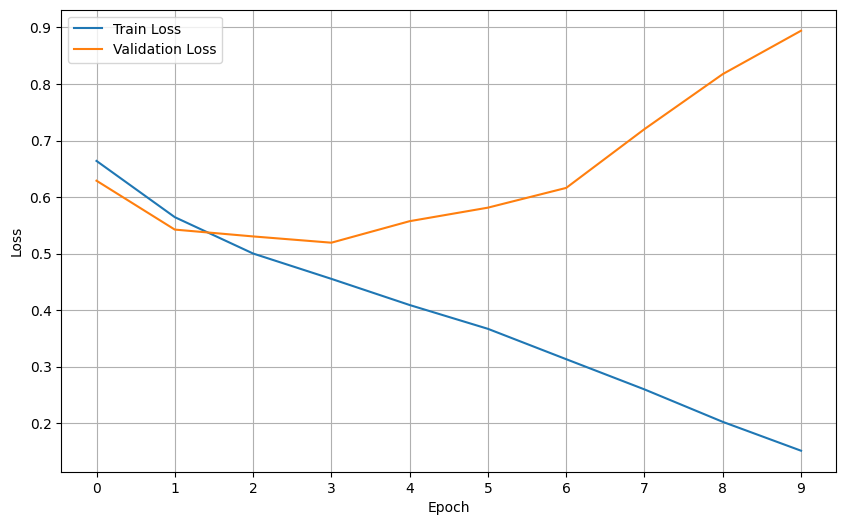

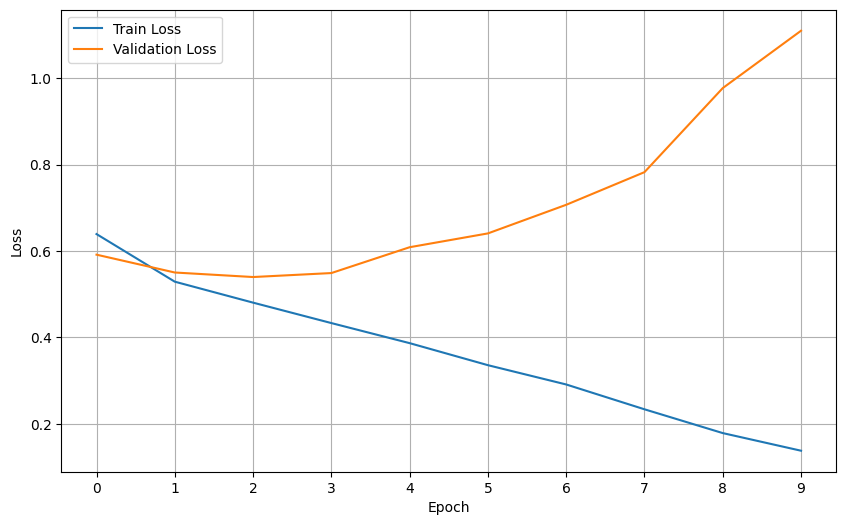

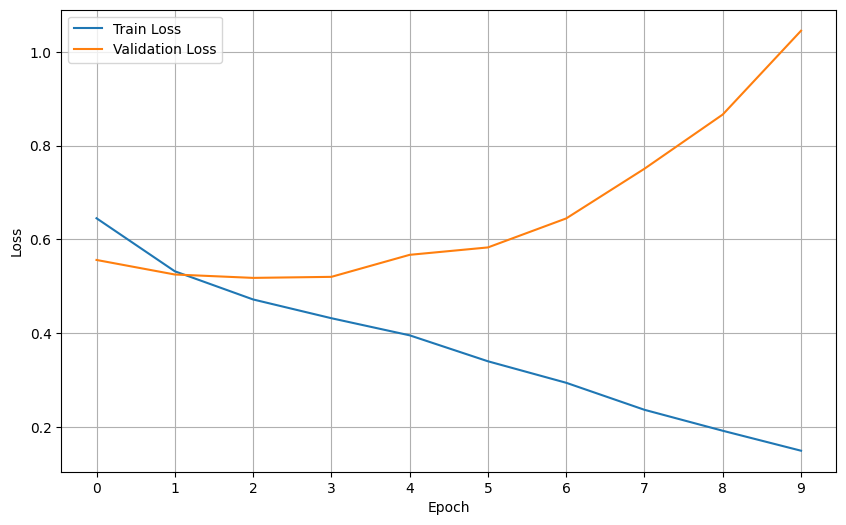

In [11]:
# Plot the loss graph
pipeline_llm_5.plot_loss()
pipeline_llm_10.plot_loss()
pipeline_llm_20.plot_loss()